In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import rankdata
from scipy.stats import kruskal
from scipy.stats import shapiro

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [10]:
df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0


# Missing values

In [11]:
df.isnull().sum()/df.isnull().count()

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.000931
ppltrst    0.001629
pplfair    0.004538
pplhlp     0.002909
happy      0.003607
sclmeet    0.001745
sclact     0.010938
gndr       0.001164
agea       0.027810
partner    0.001978
dtype: float64

THere are not many rows with missing data, so I will drop the rows with missing values

In [12]:
# Dropping rows with missing values
df.dropna(inplace=True)

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

(0.9517108201980591, 9.511383786695374e-15) (0.9547930955886841, 2.4654701498145852e-14)
(0.9680074453353882, 3.6126571179018185e-10) (0.9715775847434998, 1.8777941424019673e-09)
(0.8929166197776794, 0.10693283379077911) (0.9425466060638428, 0.4519253373146057)
(0.949491024017334, 1.6942651933374377e-19) (0.9663601517677307, 1.5275811452092943e-15)
(0.9211018085479736, 8.881221102071063e-19) (0.9292040467262268, 7.928973676032161e-18)
(0.9367397427558899, 1.2586250953636158e-18) (0.9376322627067566, 1.3852298444033788e-18)


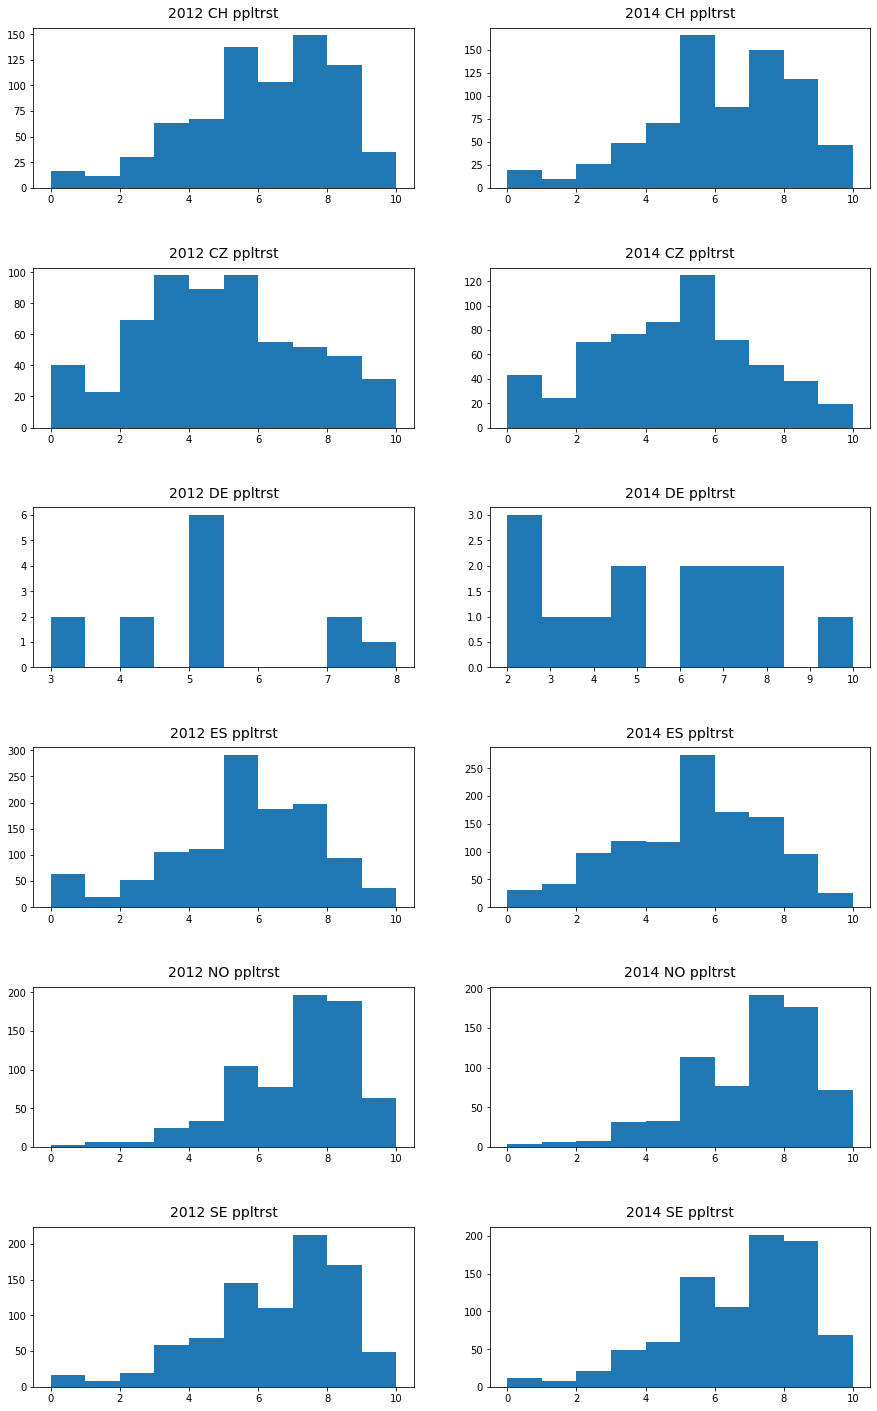

In [13]:
countries = df['cntry'].unique()

plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=.5)

i = 1
for cntry in countries:
    plt.subplot(6,2,i)
    plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst'])
    plt.title('2012 ' + cntry + ' ppltrst', fontsize=14, pad=10)

    plt.subplot(6,2,i+1)
    plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst'])
    plt.title('2014 ' + cntry + ' ppltrst', fontsize=14, pad=10)
    print(shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']), shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']))
    i += 2

plt.show()

The distributions look normal enough to use parametric tests.

In [14]:
for cntry in countries:
    trust_2012 = df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']
    trust_2014 = df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']
    print('t-test {}: {}'.format(cntry, ttest_ind(trust_2012, trust_2014)))

t-test CH: Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
t-test CZ: Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
t-test DE: Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
t-test ES: Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
t-test NO: Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
t-test SE: Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


- CH there was no significant change in trust between 2012 and 2014.
- CZ there was no significant change in trust between 2012 and 2014.
- DE there was no significant change in trust between 2012 and 2014.
- NO there was no significant change in trust between 2012 and 2014.
- ES there was a significant decrease in trust between 2012 and 2014.
- SE there was a significant increase in trust between 2012 and 2014.

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

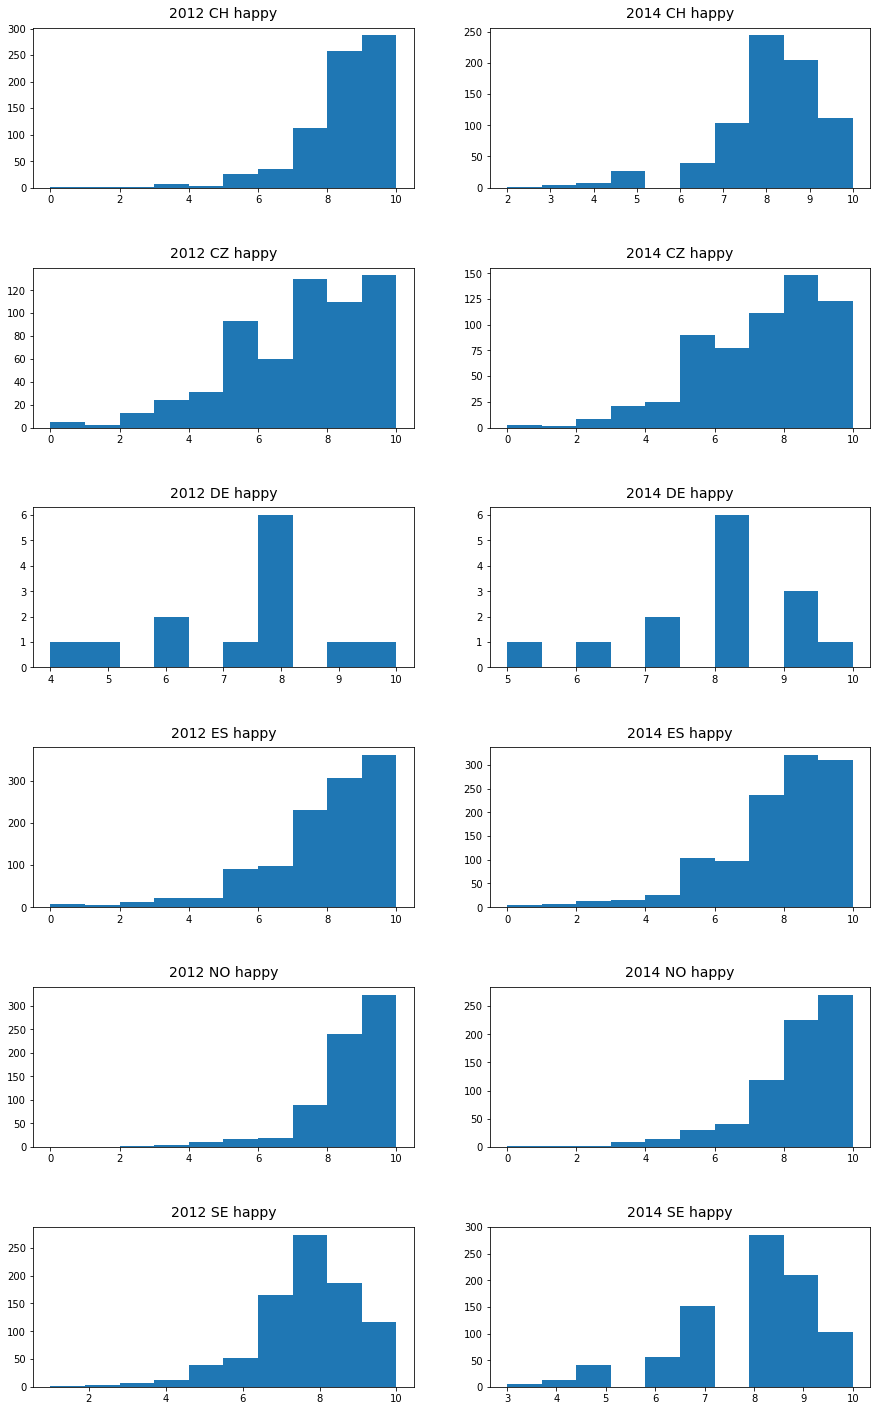

In [15]:
plt.figure(figsize=(15,25))
plt.subplots_adjust(hspace=.5)

i = 1
for cntry in countries:
    plt.subplot(6,2,i)
    plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy'])
    plt.title('2012 ' + cntry + ' happy', fontsize=14, pad=10)

    plt.subplot(6,2,i+1)
    plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy'])
    plt.title('2014 ' + cntry + ' happy', fontsize=14, pad=10)
    
    i += 2

plt.show()

The data is not normally distributed so I will use a non-parametric test.

In [16]:
happy_2012 = df[(df['year'] == 6) & (df['cntry'] == 'NO')]['happy'].mean()
happy_2014 = df[(df['year'] == 7) & (df['cntry'] == 'NO')]['happy'].mean()

print(happy_2012, happy_2014)

8.252824858757062 7.919943820224719


In [17]:
# Kruskal-Wallace Test

for cntry in countries:
    happy_2012 = df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy']
    happy_2014 = df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy']
    
    print('{}: {}'.format(cntry, kruskal(happy_2012, happy_2014)))



CH: KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
CZ: KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
DE: KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
ES: KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
NO: KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)
SE: KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)


None of the countries had any significant change in happiness except Norway. Let's see if they became more or less happy.

In [18]:
happy_2012 = df[(df['year'] == 6) & (df['cntry'] == 'NO')]['happy']
happy_2014 = df[(df['year'] == 7) & (df['cntry'] == 'NO')]['happy']

print('average happiness in Norway 2012: {}'.format(round(happy_2012.mean(),2)))
print('average happiness in Norway 2014: {}'.format(round(happy_2014.mean(),2)))

average happiness in Norway 2012: 8.25
average happiness in Norway 2014: 7.92


It appears the people of Norway became significantly less happy in 2014.

# Who reported watching more TV in 2012, men or women?

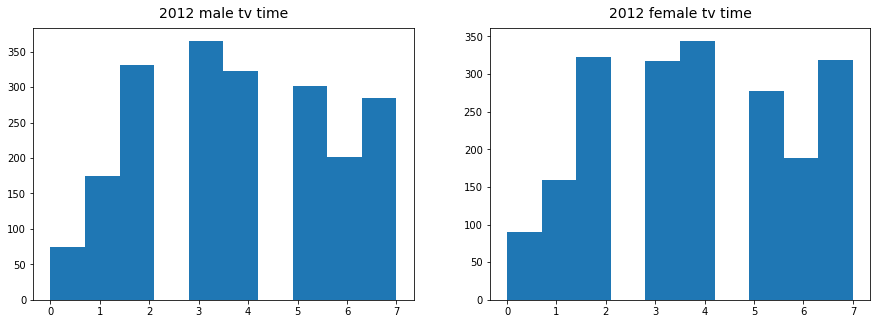

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df[(df['gndr'] == 1) & (df['year'] == 6)]['tvtot'])
plt.title('2012 male tv time', fontsize=14, pad=10)

plt.subplot(1,2,2)
plt.hist(df[(df['gndr'] == 2) & (df['year'] == 6)]['tvtot'])
plt.title('2012 female tv time', fontsize=14, pad=10)

plt.show()

The data is not normally distributed so I will use a non-parametric test.

In [20]:
# Kruskal-Wallace Test

male_tv_2012 = df[(df['gndr'] == 1) & (df['year'] == 6)]['tvtot']
female_tv_2012 = df[(df['gndr'] == 2) & (df['year'] == 6)]['tvtot']

print('average female total tv time: {}'.format(round(female_tv_2012.mean(),2)))
print('average male total tv time: {}'.format(round(male_tv_2012.mean(),2)))
print('--------------------------------')
print('male/female total tv time in 2012: {}'.format(kruskal(male_tv_2012, female_tv_2012)))

average female total tv time: 3.91
average male total tv time: 3.86
--------------------------------
male/female total tv time in 2012: KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)


The average female total tv time was slightly higher than males, however according to the kruskal_wallace test there is not a significant difference between males and females.

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

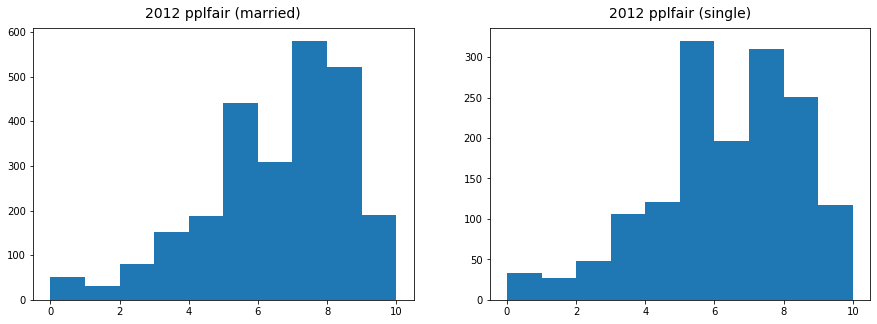

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df[(df['partner'] == 1) & (df['year'] == 6)]['pplfair'])
plt.title('2012 pplfair (married)', fontsize=14, pad=10)

plt.subplot(1,2,2)
plt.hist(df[(df['partner'] == 2) & (df['year'] == 6)]['pplfair'])
plt.title('2012 pplfair (single)', fontsize=14, pad=10)

plt.show()

The distributions look normal enough to use parametric tests.

In [22]:
married_fair_2012 = df[(df['partner'] == 1) & (df['year'] == 6)]['pplfair']
single_fair_2012 = df[(df['partner'] == 2) & (df['year'] == 6)]['pplfair']

print('average married person fairness score: {}'.format(round(married_fair_2012.mean(),2)))
print('average single person fairness score: {}'.format(round(single_fair_2012.mean(),2)))
print('--------------------------------')
print('married/single fairness scores 2012: {}'.format(ttest_ind(married_fair_2012, single_fair_2012)))

average married person fairness score: 6.07
average single person fairness score: 5.87
--------------------------------
married/single fairness scores 2012: Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


Married people gave a slightly higher fairness score on average, and according to the t-test, it was a significant difference.

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

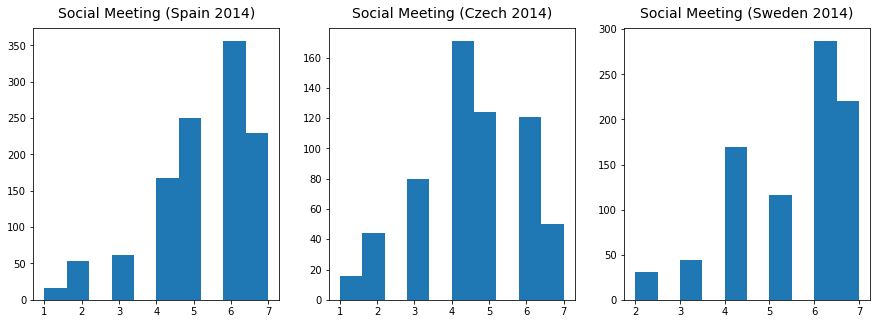

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet'])
plt.title('Social Meeting (Spain 2014)', fontsize=14, pad=10)

plt.subplot(1,3,2)
plt.hist(df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclmeet'])
plt.title('Social Meeting (Czech 2014)', fontsize=14, pad=10)

plt.subplot(1,3,3)
plt.hist(df[(df['cntry'] == 'SE') & (df['year'] == 7)]['sclmeet'])
plt.title('Social Meeting (Sweden 2014)', fontsize=14, pad=10)


plt.show()

The data is not normally distributed so I will use a non-parametric test.

In [24]:
# Kruskal-Wallace Test

spain_social_meet_2014 = df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet']
czech_social_meet_2014 = df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclmeet']
sweden_social_meet_2014 = df[(df['cntry'] == 'SE') & (df['year'] == 7)]['sclmeet']

ranks = rankdata(spain_social_meet_2014.tolist() + czech_social_meet_2014.tolist() + sweden_social_meet_2014.tolist())

spain_ranks = ranks[:len(spain_social_meet_2014)]
czech_ranks = ranks[len(spain_social_meet_2014):len(spain_social_meet_2014)+len(czech_social_meet_2014)]
sweden_ranks = ranks[len(spain_social_meet_2014)+len(czech_social_meet_2014):]

print('average social meeting ranks (Spain 2014): {}'.format(round(spain_ranks.mean(),2)))
print('average social meeting ranks (Czech 2014): {}'.format(round(czech_ranks.mean(),2)))
print('average social meeting ranks (Sweden 2014): {}'.format(round(sweden_ranks.mean(),2)))
print('--------------------------------')
print('Countries social meeting 2014: {}'.format(kruskal(spain_social_meet_2014,
                                                         czech_social_meet_2014,
                                                         sweden_social_meet_2014)))

average social meeting ranks (Spain 2014): 1368.14
average social meeting ranks (Czech 2014): 974.62
average social meeting ranks (Sweden 2014): 1450.33
--------------------------------
Countries social meeting 2014: KruskalResult(statistic=164.73114903229128, pvalue=1.6946713557834595e-36)


It appears the Czech people had significantly less social meeting than Spain or Sweden, according to the Kruskal-Wallace result.

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

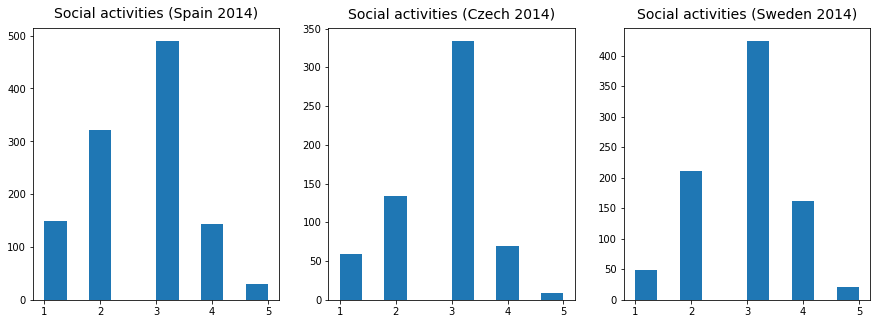

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclact'])
plt.title('Social activities (Spain 2014)', fontsize=14, pad=10)

plt.subplot(1,3,2)
plt.hist(df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclact'])
plt.title('Social activities (Czech 2014)', fontsize=14, pad=10)

plt.subplot(1,3,3)
plt.hist(df[(df['cntry'] == 'SE') & (df['year'] == 7)]['sclact'])
plt.title('Social activities (Sweden 2014)', fontsize=14, pad=10)


plt.show()

In [26]:
# Kruskal-Wallace Test

spain_social_act_2014 = df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclact']
czech_social_act_2014 = df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclact']
sweden_social_act_2014 = df[(df['cntry'] == 'SE') & (df['year'] == 7)]['sclact']

ranks = rankdata(spain_social_act_2014.tolist() + czech_social_act_2014.tolist() + sweden_social_act_2014.tolist())

spain_ranks = ranks[:1134]
czech_ranks = ranks[1134:1740]
sweden_ranks = ranks[1740:]

print('average social activity ranks (Spain 2014): {}'.format(round(spain_ranks.mean(),2)))
print('average social activity ranks (Czech 2014): {}'.format(round(czech_ranks.mean(),2)))
print('average social activity ranks (Sweden 2014): {}'.format(round(sweden_ranks.mean(),2)))
print('--------------------------------')
print('Countries social meeting 2014: {}'.format(kruskal(spain_social_act_2014,
                                                         czech_social_act_2014,
                                                         sweden_social_act_2014)))

average social activity ranks (Spain 2014): 1219.54
average social activity ranks (Czech 2014): 1307.66
average social activity ranks (Sweden 2014): 1411.91
--------------------------------
Countries social meeting 2014: KruskalResult(statistic=36.9246206112881, pvalue=9.592250484702523e-09)


According to the Kruskal Wallace test there is a significant difference in social activity between countries. Spain had the least social activity, and Sweden had the most. The Czech republic was in the middle.